# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Assign it to a variable called chipo.

In [34]:
import pandas as pd

In [35]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

### See the first 10 entries

In [36]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### What is the number of observations in the dataset?

In [37]:
# Solution 1
chipo.shape[0]

4622

In [38]:
chipo.shape

(4622, 5)

In [39]:
# Solution 2
chipo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### What is the number of columns in the dataset?

In [40]:
chipo.shape[1]

5

### Print the name of all the columns.

In [41]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### How is the dataset indexed?

In [42]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Which was the most-ordered item? 

In [43]:
king_df = chipo.groupby('item_name')
king_df= king_df.sum()
king_df = king_df.sort_values(['quantity'], ascending=False)
king_df.head(2)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591


In [44]:
import matplotlib.pyplot as plt 
import numpy as np

In [45]:
quantity_df = chipo.sort_values(['quantity'], ascending=True)
quantity_df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
3020,1201,1,Canned Soda,[Diet Dr. Pepper],$1.09
3021,1201,1,Bottled Water,NaN,$1.09
3022,1201,1,Side of Chips,NaN,$1.69
3023,1202,1,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",$8.49
...,...,...,...,...,...
2441,970,5,Bottled Water,NaN,$7.50
3599,1443,7,Bottled Water,NaN,$10.50
3887,1559,8,Side of Chips,NaN,$13.52
4152,1660,10,Bottled Water,NaN,$15.00


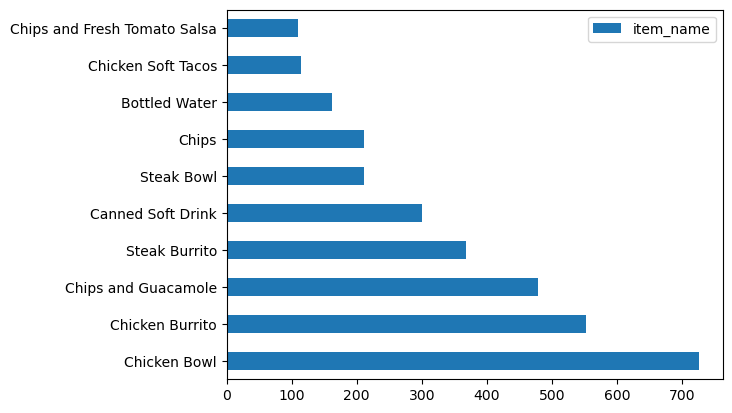

In [46]:
(chipo.item_name.value_counts().head(10)).plot(kind ='barh', legend =True)

plt.show()

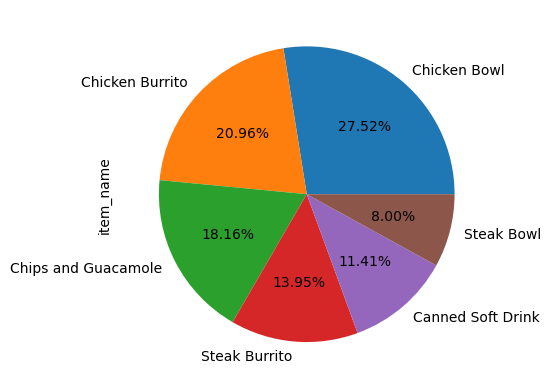

In [47]:
(chipo.item_name.value_counts().head(6)).plot(kind ='pie',autopct='%1.2f%%', legend =False)


plt.gca().set_aspect('equal')
plt.show()

### For the most-ordered item, how many items were ordered?

In [48]:
king_df= chipo.groupby('item_name')
king_df = king_df.sum()
king_df = king_df.sort_values(['quantity'], ascending=False)
king_df.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### What was the most ordered item in the choice_description column?

In [49]:
king_df = chipo.groupby('choice_description').sum()
king_df = king_df.sort_values(['quantity'], ascending=False)
king_df.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


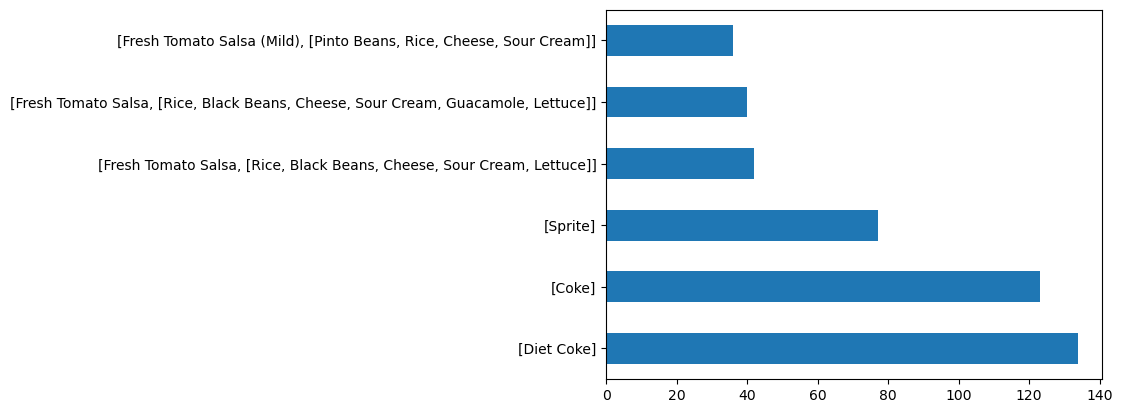

In [50]:
chipo.choice_description.value_counts(sort=True).head(6).plot.barh()


plt.show()

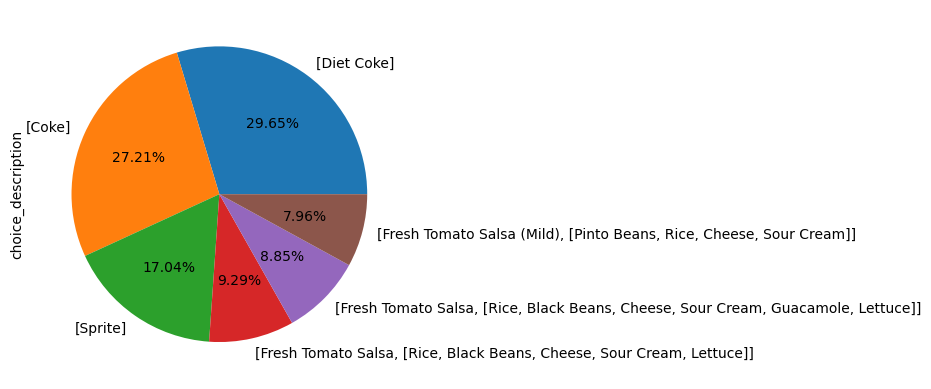

In [51]:
(chipo.choice_description.value_counts().head(6)).plot(kind ='pie',autopct='%1.2f%%', legend =None)


plt.gca().set_aspect('equal')
plt.show()

### How many items were orderd in total?

In [52]:
total_item =chipo.quantity.sum()
total_item

4972

### Turn the item price into a float

####a. Check the item price type

In [53]:
chipo.item_price.dtype

dtype('O')

####b. Create a lambda function and change the type of item price

In [54]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

####c. Check the item price type

In [55]:
chipo.item_price.dtype

dtype('float64')

### How much was the revenue for the period in the dataset?

In [56]:
import numpy as np

In [57]:
revenue = (chipo['quantity']* chipo['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


### How many orders were made in the period?

In [58]:
order = chipo.order_id.value_counts().count()

In [59]:
order

1834

### What is the average revenue amount per order?

In [60]:
# Solution 1
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']


21.394231188658654

In [61]:
# Solution 2

chipo.groupby(by =['order_id']).sum().mean()['revenue']

21.394231188658654

### How many different items are sold?

In [62]:
chipo.item_name.value_counts().count()

50